___

<a><img src='Telco002.jpg'/></a>
___


# Supervised Learning - Tree Methods - TELCO Churn Analysis

------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Data
**The data for this analysis was retrieved from Kaggle https://www.kaggle.com/datasets/blastchar/telco-customer-churn.**

## Part 0: Importing the libraries needed and Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**We confirm quickly with .info() methods the datatypes and non-null values in the dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Now we get a quick statistical summary of the numeric columns with .describe() , we should notice that many columns are categorical, meaning we will eventually need to convert them to dummy variables.**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**We confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Now we display the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

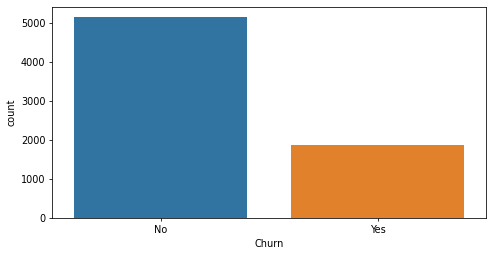

In [7]:
plt.figure(figsize=(8,4),dpi=70)
sns.countplot(data=df,x='Churn')

**We explore too the distribution of TotalCharges between Churn categories with a Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

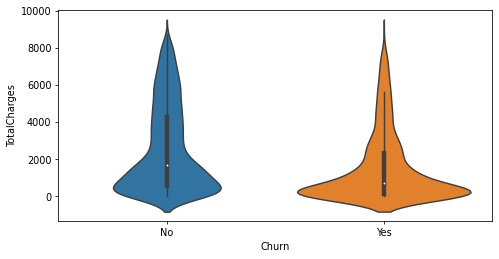

In [8]:
plt.figure(figsize=(8,4),dpi=70)
sns.violinplot(data=df,x='Churn',y='TotalCharges')

**To show the distribution of TotalCharges per Contract type, we create a boxplot, we also add a hue coloring based on the Churn class.**

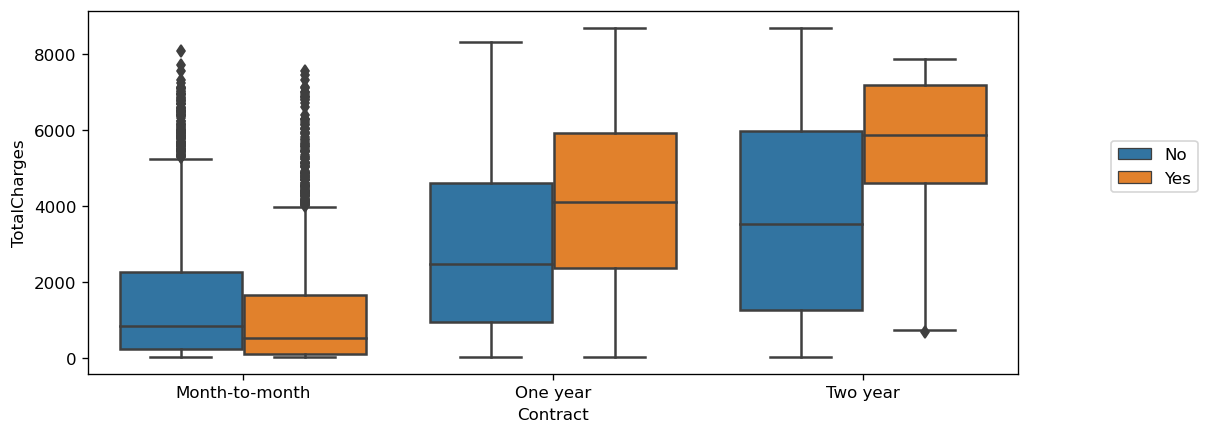

In [9]:
plt.figure(figsize=(10,4),dpi=120)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

**To create a bar plot showing the correlation of the following features to the class label. We have to keep in mind, that for the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [12]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

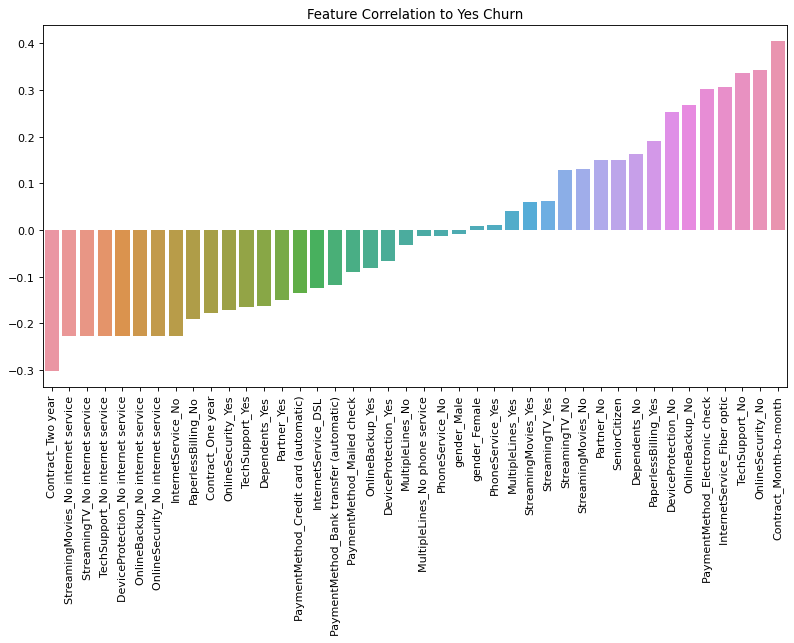

In [13]:
plt.figure(figsize=(12,6),dpi=80)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**We explore what are the 3 contract types available?**

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Now we'll create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

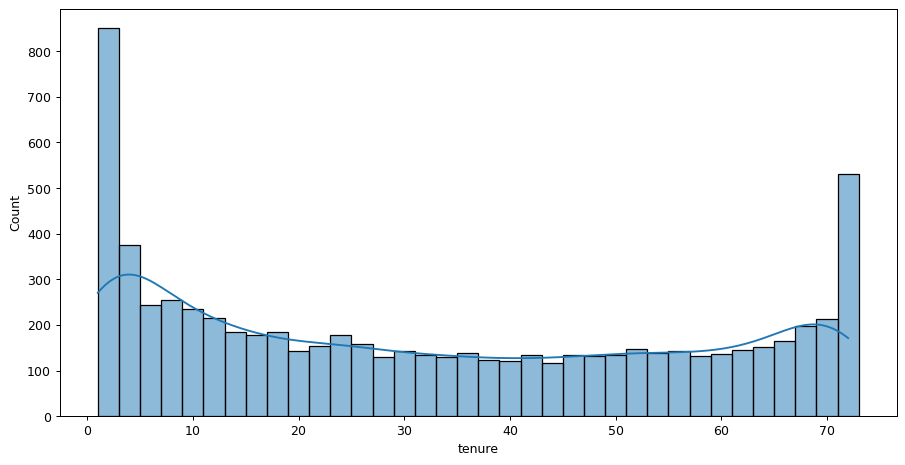

In [15]:
plt.figure(figsize=(12,6),dpi=90)
sns.histplot(data=df,x='tenure',bins=60, binwidth=2, kde=True)

**TASK: Now we use a displot to show the Churn and Contract features.**

<Figure size 1080x540 with 0 Axes>

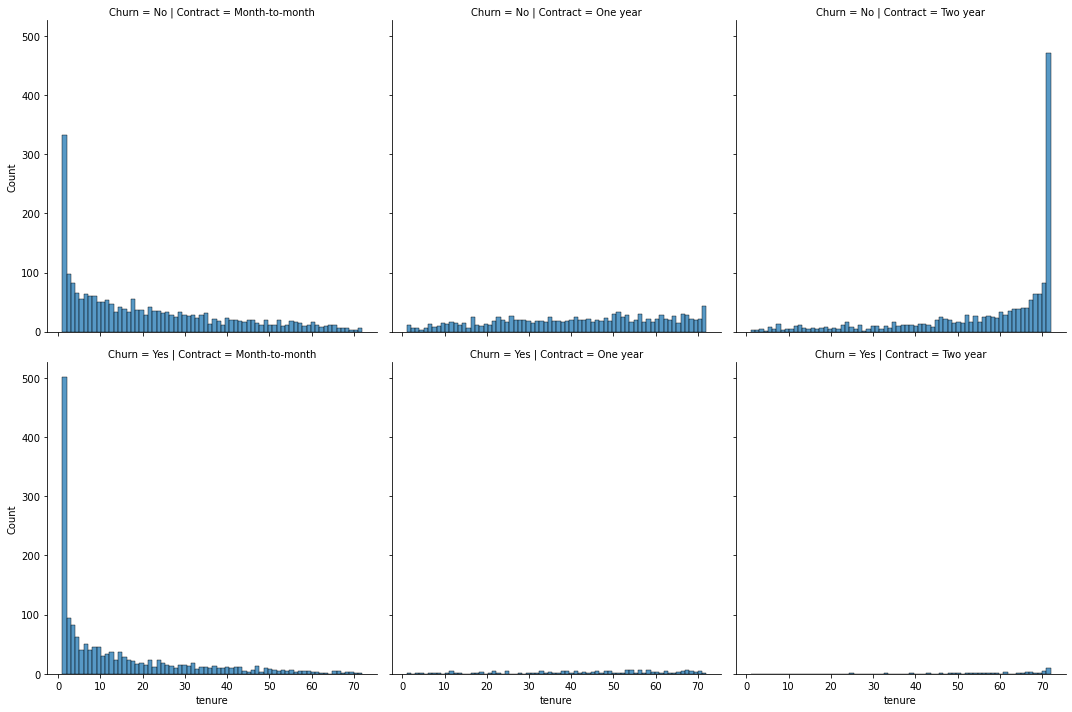

In [16]:
plt.figure(figsize=(12,6),dpi=90)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Now through a scatter plot we show the Total Charges versus Monthly Charges, and we colored the hue by Churn.**

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

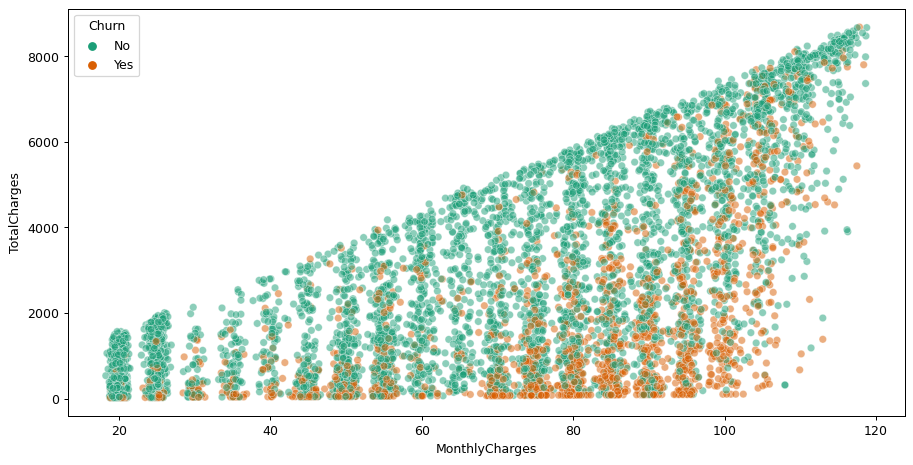

In [18]:
plt.figure(figsize=(12,6),dpi=90)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**We are going to treat each unique tenure group as a cohort and then calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. We should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as we are less likely to stop service the longer we've had it.**

In [19]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [20]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


**We calculate the Churn Rate in percentage.**

In [21]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [22]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Now that we have Churn Rate per tenure group 1-72 months, we create a plot showing churn rate per months of tenure.**

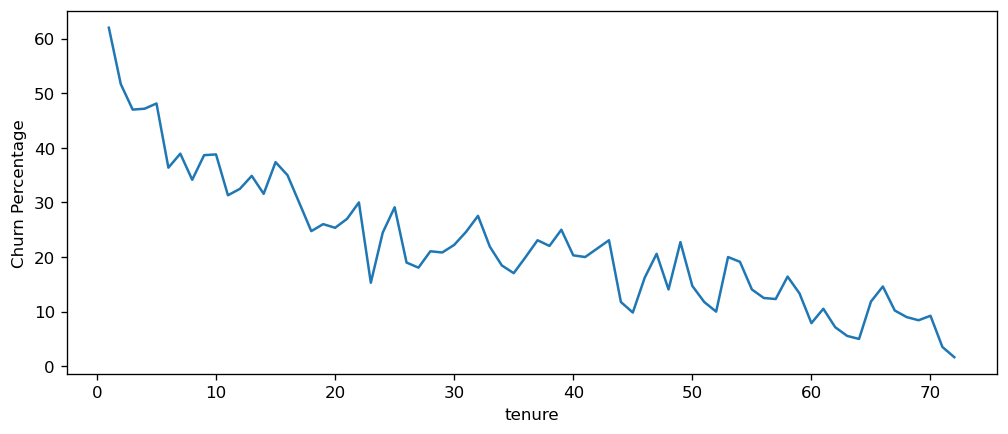

In [23]:
plt.figure(figsize=(10,4),dpi=120)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Broader Cohort Groups
**Based on the following tenure column values, we create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '24-48 Months'
   * '12-24 Months'
   * 'Over 48 Months'    

In [24]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

**We [Apply] the previous function to the [tenure] column and see the results.**

In [25]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [26]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**Once the categories have been defined, we create a scatterplot of Total Charges versus Monthly Charts and colored by Tenure Cohort.**

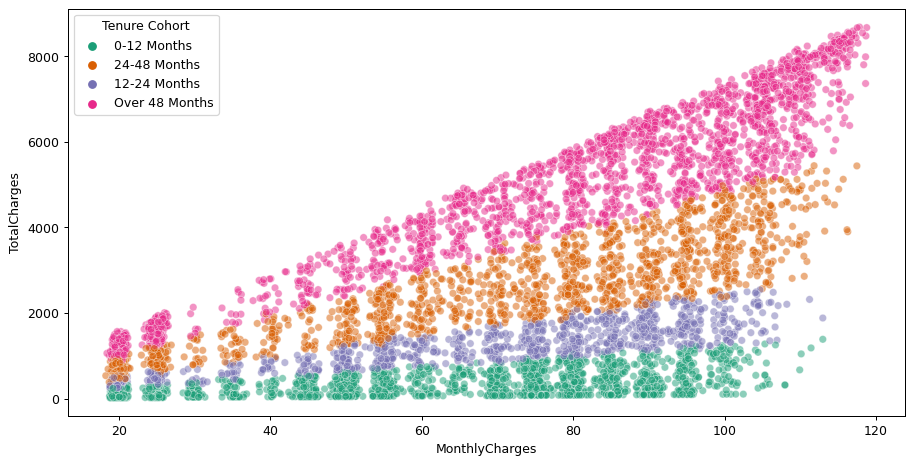

In [27]:
plt.figure(figsize=(12,6),dpi=90)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

**To find out the count of churn count per cohort we create a countplot.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

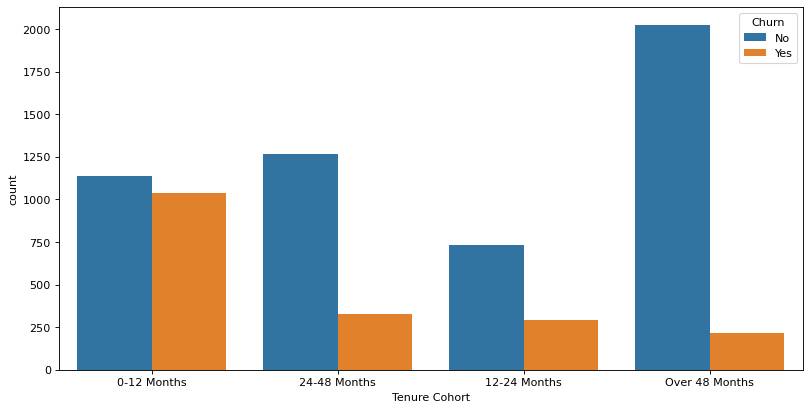

In [28]:
plt.figure(figsize=(12,6),dpi=80)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

**Finally, we'll create a grid of Count Plots showing counts per Tenure Cohort and we'll separate them out by contract type and hue by the Churn.**

<Figure size 1440x720 with 0 Axes>

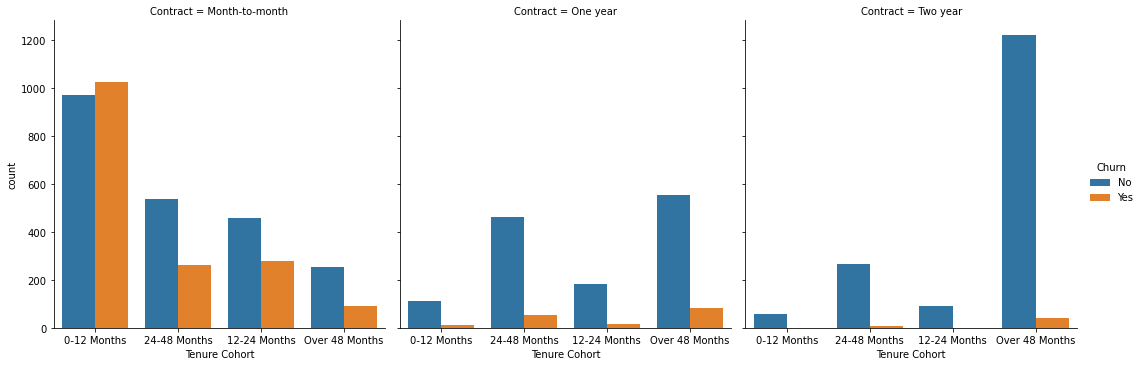

In [29]:
plt.figure(figsize=(12,6),dpi=120)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

-----

# Part 4: Predictive Modeling

**Now we explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**First, we separate out the data into X features and Y labels and create dummy variables where necessary, the features that are not useful will be dropped [churn,customerID].**

In [30]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [31]:
y = df['Churn']

**Now we perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 96 to keep the values unchanged.**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=96)

**Decision Tree Perfomance. We'll complete the following steps:**
   1. We train a single decision tree model(The optimal hyperparameters will be chosen according to commonly used values.)
   2. We evaluate the performance metrics from decision tree, including a classification report and plotting a confusion matrix.
   2. We calculate feature importances from the decision tree.
   4. Finally, we plot the tree.

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(max_depth=6)

In [36]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [37]:
preds = dt.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [39]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       539
         Yes       0.57      0.53      0.55       165

    accuracy                           0.80       704
   macro avg       0.71      0.70      0.71       704
weighted avg       0.79      0.80      0.79       704



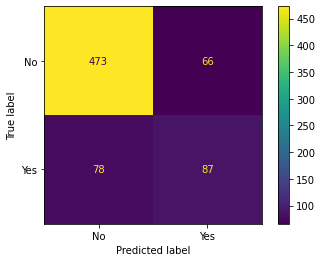

In [40]:
plot_confusion_matrix(dt,X_test,y_test)

In [41]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

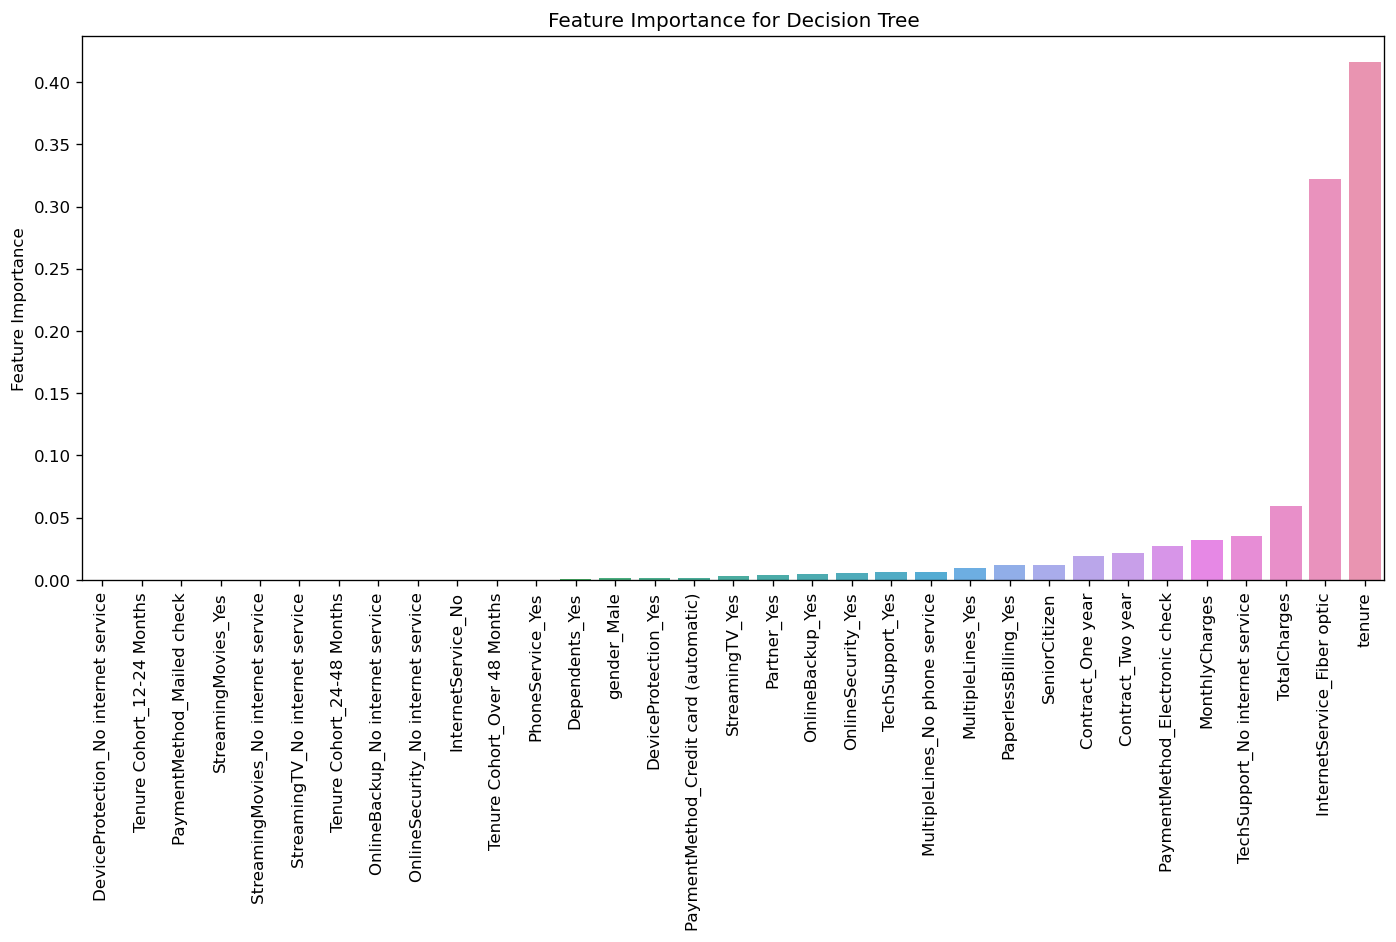

In [42]:
plt.figure(figsize=(14,6),dpi=120)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [43]:
from sklearn.tree import plot_tree

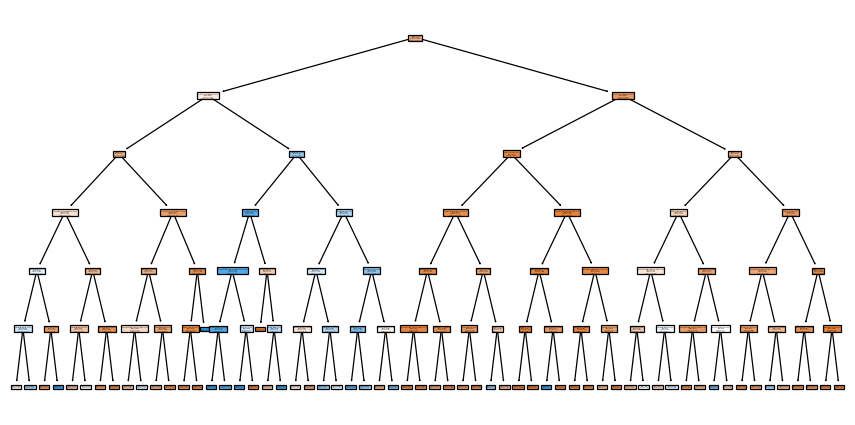

In [44]:
plt.figure(figsize=(12,6),dpi=90)
plot_tree(dt,filled=True,feature_names=X.columns);

## Random Forest

**Like the previous model, we create a Random Forest model with a classification report and a confusion matrix from its predicted results on the test set.**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=100)

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
preds = rf.predict(X_test)

In [49]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       539
         Yes       0.57      0.48      0.52       165

    accuracy                           0.79       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.78      0.79      0.79       704



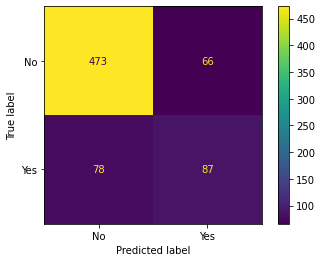

In [50]:
plot_confusion_matrix(dt,X_test,y_test)

## Boosted Trees

**Finally we make use of AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [51]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [52]:
ada_model = AdaBoostClassifier()

In [53]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [54]:
preds = ada_model.predict(X_test)

In [55]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       539
         Yes       0.58      0.55      0.56       165

    accuracy                           0.80       704
   macro avg       0.72      0.71      0.72       704
weighted avg       0.80      0.80      0.80       704



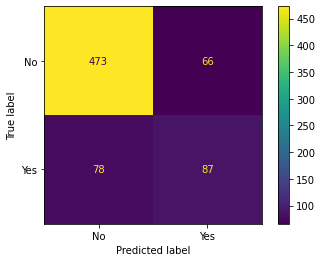

In [56]:
plot_confusion_matrix(dt,X_test,y_test)

**Analyzing the results, we can conclude that we got the best performance from AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.**

By Santiago A. Jiménez